## Data Preprocessing

### 1. Reading data

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
from subprocess import check_output
import missingno as msno

data_dir = './zillow data/'
print(check_output(["ls", data_dir]).decode("utf8"))

properties_2016.csv
properties_2017.csv
sample_submission.csv
train_2016_v2.csv
train_2017.csv
zillow_data_dictionary.xlsx



In [2]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import warnings
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
train_2016  = pd.read_csv('./zillow data/train_2016_v2.csv')
train_2017  = pd.read_csv('./zillow data/train_2017.csv')

In [4]:
properties_2016 = pd.read_csv('./zillow data/properties_2016.csv')
properties_2017 = pd.read_csv('./zillow data/properties_2017.csv')

In [9]:
zillow_dictionary = pd.read_excel('./zillow data/zillow_data_dictionary.xlsx')

In [19]:
submission = pd.read_csv('./zillow data/sample_submission.csv')

In [23]:
submission.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [25]:
print ("Shape Of Train: ",train_2016.shape)
print ("Shape Of Properties: ",properties_2016.shape)
print("Shape Of Submission: ",submission.shape)

Shape Of Train:  (90275, 3)
Shape Of Properties:  (2985217, 58)
Shape Of Submission:  (2985217, 7)


In [28]:
train_2017.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [255]:
p0 = properties_2016['latitude']
p0 = p0[p0.isna()]
p0 = properties_2016.iloc[2973780:,1:]
for element in p0.columns.values:
    print(element, p0[p0[element].notna()].shape[0])

airconditioningtypeid 0
architecturalstyletypeid 0
basementsqft 0
bathroomcnt 0
bedroomcnt 0
buildingclasstypeid 0
buildingqualitytypeid 0
calculatedbathnbr 0
decktypeid 0
finishedfloor1squarefeet 0
calculatedfinishedsquarefeet 0
finishedsquarefeet12 0
finishedsquarefeet13 0
finishedsquarefeet15 0
finishedsquarefeet50 0
finishedsquarefeet6 0
fips 0
fireplacecnt 0
fullbathcnt 0
garagecarcnt 0
garagetotalsqft 0
hashottuborspa 0
heatingorsystemtypeid 0
latitude 0
longitude 0
lotsizesquarefeet 0
poolcnt 0
poolsizesum 0
pooltypeid10 0
pooltypeid2 0
pooltypeid7 0
propertycountylandusecode 0
propertylandusetypeid 0
propertyzoningdesc 0
rawcensustractandblock 0
regionidcity 0
regionidcounty 0
regionidneighborhood 0
regionidzip 0
roomcnt 0
storytypeid 0
threequarterbathnbr 0
typeconstructiontypeid 0
unitcnt 0
yardbuildingsqft17 0
yardbuildingsqft26 0
yearbuilt 0
numberofstories 0
fireplaceflag 0
structuretaxvaluedollarcnt 0
taxvaluedollarcnt 0
assessmentyear 0
landtaxvaluedollarcnt 0
taxamount 

In [258]:
p0 = properties_2017.iloc[2973780:,1:]
for element in p0.columns.values:
    print(element, p0[p0[element].notna()].shape[0])

airconditioningtypeid 1969
architecturalstyletypeid 24
basementsqft 0
bathroomcnt 8505
bedroomcnt 8505
buildingclasstypeid 5
buildingqualitytypeid 4535
calculatedbathnbr 8274
decktypeid 15
finishedfloor1squarefeet 147
calculatedfinishedsquarefeet 8352
finishedsquarefeet12 7855
finishedsquarefeet13 0
finishedsquarefeet15 383
finishedsquarefeet50 147
finishedsquarefeet6 114
fips 8505
fireplacecnt 949
fullbathcnt 8274
garagecarcnt 3584
garagetotalsqft 3584
hashottuborspa 226
heatingorsystemtypeid 4557
latitude 8505
longitude 8505
lotsizesquarefeet 7443
poolcnt 1296
poolsizesum 12
pooltypeid10 76
pooltypeid2 150
pooltypeid7 1145
propertycountylandusecode 8504
propertylandusetypeid 8505
propertyzoningdesc 4598
rawcensustractandblock 8505
regionidcity 8315
regionidcounty 8505
regionidneighborhood 2124
regionidzip 8501
roomcnt 8505
storytypeid 0
threequarterbathnbr 1356
typeconstructiontypeid 25
unitcnt 4656
yardbuildingsqft17 37
yardbuildingsqft26 1
yearbuilt 8349
numberofstories 2551
firepl

In [256]:
properties_2016 = properties_2016.iloc[0:2973780,:]

In [257]:
properties_2016.shape

(2973780, 58)

### Merge training data with properties

In [261]:
merged_2016 = pd.merge(train_2016,properties_2016,on="parcelid",how="left")
merged_2017 = pd.merge(train_2017,properties_2017,on="parcelid",how="left")

### Visualize missing value of Properties

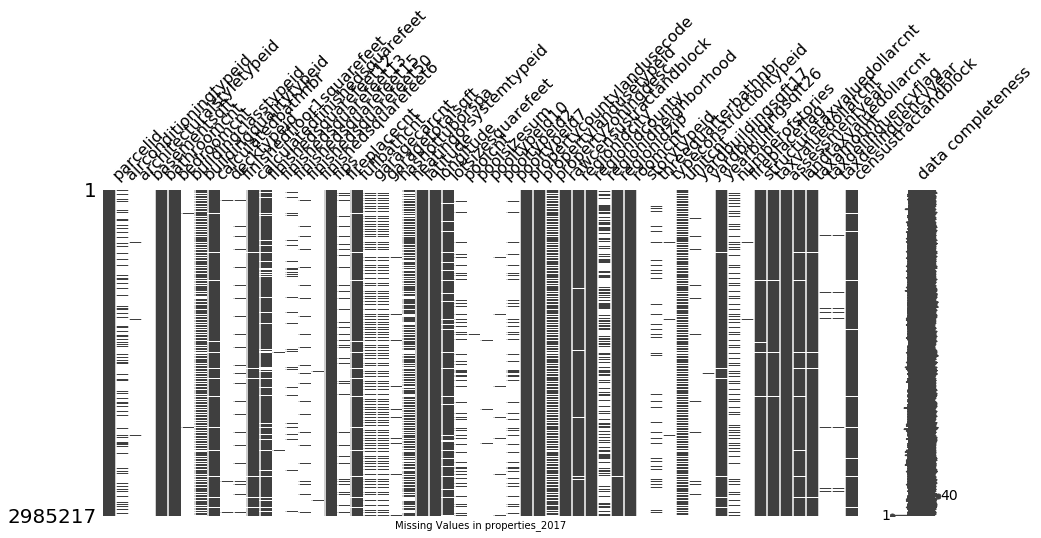

In [13]:
file = 'properties_2017'
msno.matrix(df=eval(file), figsize=(15,6),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

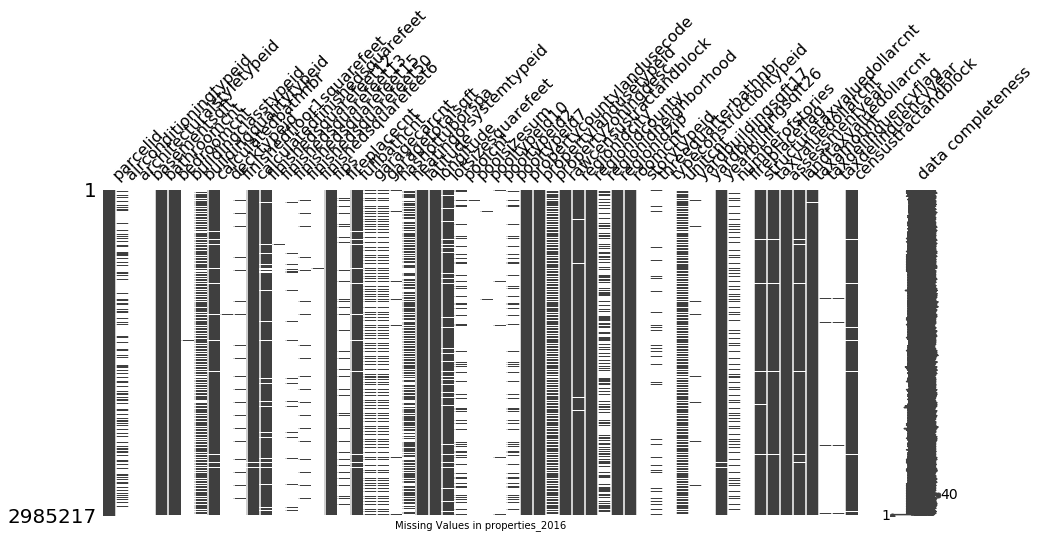

In [14]:
file = 'properties_2016'
msno.matrix(df=eval(file), figsize=(15,6),labels = True)
plt.xlabel('Missing Values in ' + file)
plt.show()

### Missing value ratios

### Feature1 airconditioningtypeid: Because most of aircondition type is 1(central type), so we drop this features

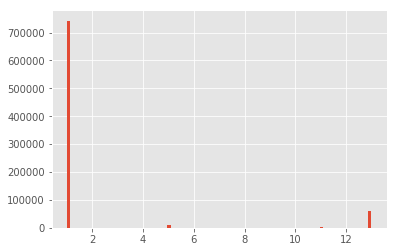

In [263]:
properties_2016['airconditioningtypeid'].hist(bins = 100)

In [264]:
properties_2016_new = properties_2016.drop('airconditioningtypeid', axis = 1)

### Feature2: architecturalstyletypeid: Most of architectural style type is missing, I guess most of people don't know what type of architectual style his or her house is, so they don't fill in any type, so this features is not useful for us, we just drop it.

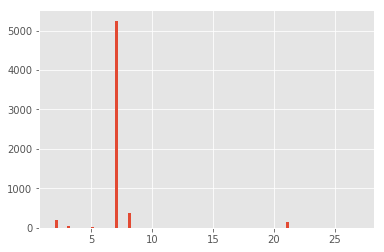

In [265]:
architecture = properties_2016['architecturalstyletypeid']
architecture.hist(bins = 100)
properties_2016_new = properties_2016_new.drop('architecturalstyletypeid', axis = 1)

### Feature3: Basement square area: most of house has no basement, so this feature we just drop it

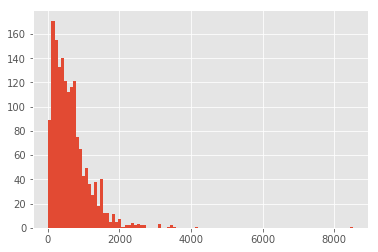

In [266]:
properties_2016['basementsqft'].hist(bins = 100)
properties_2016_new = properties_2016_new.drop('basementsqft', axis = 1)

### Feature4, 5: bedroomcnt / bathroomcnt: because the distribution of data is around normal, we use mode to replace missing value

2.2091427336818263
0    2.0
dtype: float64
3.088948797938776
0    3.0
dtype: float64


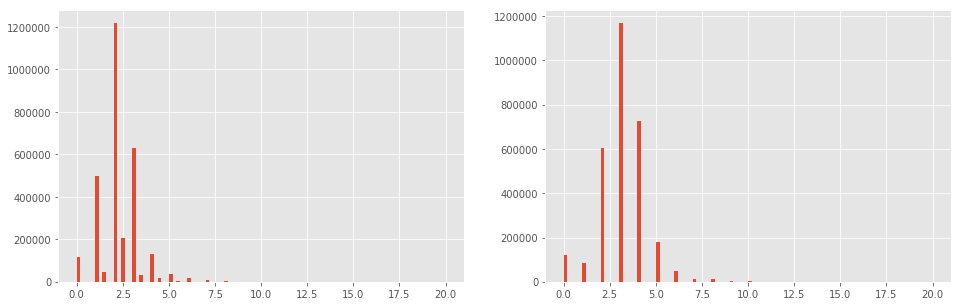

In [267]:
fig,axes = plt.subplots(1,2, figsize = (16,5))
axes[0] = properties_2016_new['bathroomcnt'].hist(bins = 100, ax = axes[0])
axes[1] = properties_2016_new['bedroomcnt'].hist(bins = 100)
print(properties_2016_new['bathroomcnt'].mean())
print(properties_2016_new['bathroomcnt'].mode())
print(properties_2016_new['bedroomcnt'].mean())
print(properties_2016_new['bedroomcnt'].mode())

In [269]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
X_new = imp.fit_transform(properties_2016_new['bathroomcnt'].values.reshape(-1,1))
properties_2016_new['bathroomcnt'] = X_new
X_new = imp.fit_transform(properties_2016_new['bedroomcnt'].values.reshape(-1,1))
properties_2016_new['bedroomcnt'] = X_new

### Feature 6: bulidingclasstypeid: Most of value missing so we just drop this columns

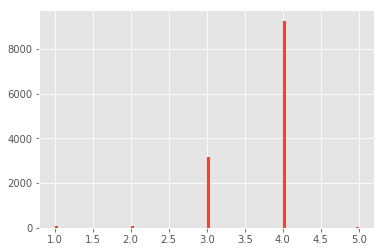

In [270]:
properties_2016['buildingclasstypeid'].hist(bins = 100)
properties_2016_new = properties_2016_new.drop('buildingclasstypeid', axis = 1)

### *Feature7: buildqualitytypeid: we can assign missing value as another type, because the number of missing data and not missing data are almost same

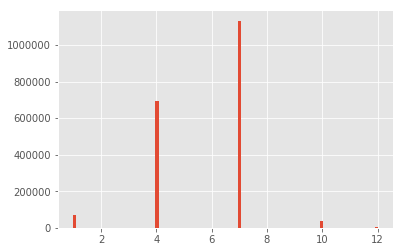

In [271]:
properties_2016_new['buildingqualitytypeid'].hist(bins = 100)

In [288]:
print(properties_2016_new['buildingqualitytypeid'].unique())
p1 = properties_2016_new['buildingqualitytypeid']
p1 = p1.fillna(0.0)
p1[p1.isna()].shape[0]
properties_2016_new['buildingqualitytypeid'] = p1

[nan  7.  4. 10.  1. 12.  8.  3.  6.  9.  5. 11.  2.]


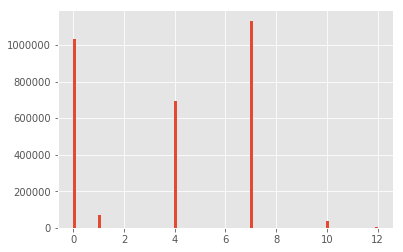

In [291]:
properties_2016_new['buildingqualitytypeid'].hist(bins = 100)

### Feature 8: calculatedbathnbr: this feature is duplicated with bathroomcnt, so we drop this feature

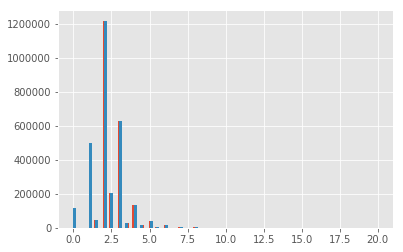

In [292]:
properties_2016_new['calculatedbathnbr'].hist(bins = 100)
properties_2016_new['bathroomcnt'].hist(bins = 100)
properties_2016_new = properties_2016_new.drop('calculatedbathnbr', axis = 1)

### Feature 9: decktypeid most of data missing so we just delete this feature

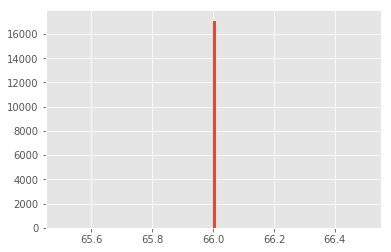

In [293]:
properties_2016_new['decktypeid'].hist(bins = 100)
properties_2016_new = properties_2016_new.drop('decktypeid', axis = 1)

### *Feature 10,15: finishedfloor1squarefeet and finishedsquarefeet50: this two feature is same, we drop one of them

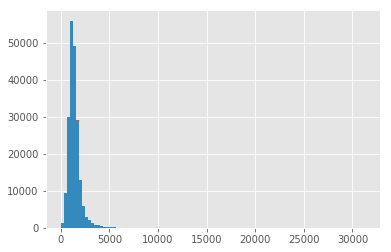

In [294]:
properties_2016_new['finishedfloor1squarefeet'].hist(bins = 100)
properties_2016_new['finishedsquarefeet50'].hist(bins = 100)
properties_2016_new = properties_2016_new.drop('finishedsquarefeet50', axis = 1)

### *Feature 11, 12, 13, 14, 16: calculatedfinishedsquarefeet = all other features, so we drop all of them

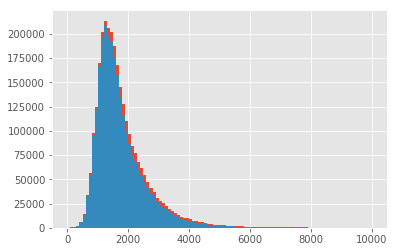

In [151]:
p1 = properties_2016_new['calculatedfinishedsquarefeet']
p2 = properties_2016_new['finishedsquarefeet12']
p1[p1<10000].hist(bins=100)
p2[p2<10000].hist(bins=100)
properties_2016_new = properties_2016_new.drop('finishedsquarefeet12', axis = 1)

In [304]:
p0 = properties_2016_new['calculatedfinishedsquarefeet']

p1 = properties_2016_new['finishedsquarefeet6']
p2 = properties_2016_new['finishedsquarefeet12']
p3 = properties_2016_new['finishedsquarefeet13']
p4 = properties_2016_new['finishedsquarefeet15']
p6 = properties_2016_new['finishedfloor1squarefeet']

In [307]:
print(p0[p0.isna()].shape[0])

44128


In [300]:
p1 = p1[p1.notna()]
p2 = p2[p2.notna()]
p3 = p3[p3.notna()]
p4 = p4[p4.notna()]
p6 = p6[p6.notna()]

p0 = p0[p0.notna()]

In [301]:
print(p0.shape[0])
print(p1.shape[0]+p2.shape[0]+p3.shape[0]+p4.shape[0])

2929652
2929655


In [302]:
print(p1.shape[0],p2.shape[0],p3.shape[0],p4.shape[0], p5.shape[0],p6.shape[0])

22001 2709184 7672 190798 202717 202717


In [315]:
print(p0.mean())
print(p0[p0<8000].mean())
p0.mode()[0]

1821.4170147085526
1786.717346113617


1440.0

In [323]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
X_new = imp.fit_transform(properties_2016_new['calculatedfinishedsquarefeet'].values.reshape(-1,1))
properties_2016_new['calculatedfinishedsquarefeet'] = X_new

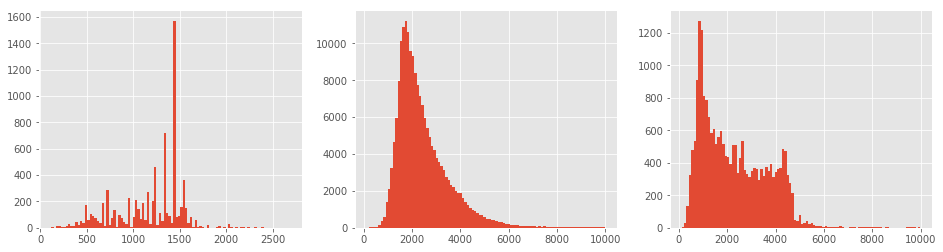

In [330]:
fig, axes = plt.subplots(1,3,figsize = (16,4))
properties_2016_new['finishedsquarefeet13'].hist(bins = 100, ax = axes[0])
p1 = properties_2016_new['finishedsquarefeet15']
p1[p1<10000].hist(bins = 100, ax = axes[1])
p2 = properties_2016_new['finishedsquarefeet6']
p2[p2<10000].hist(bins = 100, ax = axes[2])

In [331]:
properties_2016_new = properties_2016_new.drop('finishedsquarefeet13', axis = 1)
properties_2016_new = properties_2016_new.drop('finishedsquarefeet15', axis = 1)
properties_2016_new = properties_2016_new.drop('finishedsquarefeet6', axis = 1)

### Feauture 17: fips: maybe we can use location to determine which county they belong to, no missing value

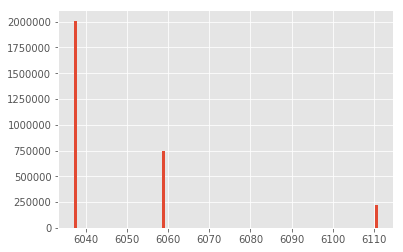

In [332]:
properties_2016_new['fips'].hist(bins = 100)

In [333]:
print(properties_2016_new['fips'].shape[0] - properties_2016_new['fips'][properties_2016_new['fips'].notna()].shape[0])

0


### *Feature 18,50: fireplace cnt and flag: we drop flag

In [334]:
p1 = properties_2016_new['fireplaceflag']
p2 = properties_2016_new['fireplacecnt']
print(p1.unique())
print(p2.unique())

[nan True]
[nan  3.  1.  2.  4.  9.  5.  7.  6.  8.]


In [335]:
print(p1[p1.notna()].shape[0])
print(p2[p2.notna()].shape[0])

5163
312637


In [336]:
properties_2016_new = properties_2016_new.drop('fireplaceflag',axis = 1)

### Feature 19,43: fullbathcnt, threequarterbathcnt 

In [337]:
p1 = properties_2016_new['fullbathcnt']
p2 = properties_2016_new['threequarterbathnbr']
p3 = properties_2016_new['bathroomcnt']
print(p1.unique())
print(p2.unique())
print(p3.unique())

[nan  2.  4.  3.  1.  5.  7.  6. 10.  8.  9. 12. 11. 13. 14. 20. 19. 15.
 18. 16. 17.]
[nan  1.  2.  4.  3.  6.  5.  7.]
[ 0.    2.    4.    3.    1.    2.5   3.5   5.    1.5   4.5   7.5   5.5
  6.    7.   10.    8.    9.   12.   11.    8.5   6.5  13.    9.5  14.
 20.   19.5  15.   10.5  18.   16.    1.75 17.   19.    0.5  12.5  11.5
 14.5 ]


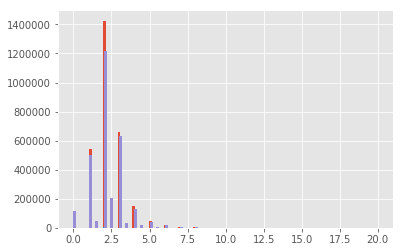

In [340]:
p1.hist(bins =100)
p2.hist(bins = 100)
p3.hist(bins = 100)

### Feature20,21: garage car cnt / area:

### Feature 23: HeatsystemID, we just assign missing value as another type 0

In [342]:
p1 = properties_2016_new['heatingorsystemtypeid']
p1.unique()

array([nan,  2.,  7., 20.,  6., 13., 18., 24., 12., 10.,  1., 14., 21.,
       11., 19.])

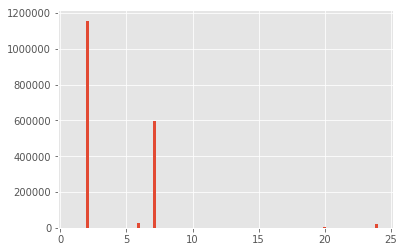

In [343]:
p1.hist(bins = 100)

In [344]:
print(properties_2016_new['heatingorsystemtypeid'].unique())
p1 = properties_2016_new['heatingorsystemtypeid']
p1 = p1.fillna(0.0)
p1[p1.isna()].shape[0]
properties_2016_new['buildingqualitytypeid'] = p1

[nan  2.  7. 20.  6. 13. 18. 24. 12. 10.  1. 14. 21. 11. 19.]


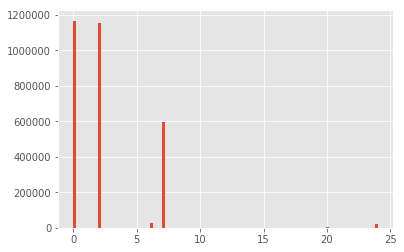

In [346]:
p1.hist(bins = 100)

### Feature 24,25: latitude, longitude, no missing value

In [230]:
p1 = properties_2016_new['latitude']
p2 = properties_2016_new['longitude']
p3 = properties_2016_new['regionidcounty']
print(p1.shape[0] - p1[p1.notna()].shape[0])
print(p2.shape[0] - p2[p2.notna()].shape[0])
print(p3.shape[0] - p3[p3.notna()].shape[0])

11437
11437
11437


In [233]:
p1 = merged_2016['latitude']
p2 = merged_2016['longitude']
p3 = merged_2016['regionidcounty']
print(p1.shape[0] - p1[p1.notna()].shape[0])
print(p2.shape[0] - p2[p2.notna()].shape[0])
print(p3.shape[0] - p3[p3.notna()].shape[0])

0
0
0


### Feature 26: lotsize

### *Feauture  22,27,28,29,30,31: pool cnt/ type

In [348]:
properties_2016_new['poolcnt'].unique()

array([nan,  1.])

##### this feature has 1 pool or no pool, so we can assign missing value with 0 to denote no pool

In [370]:
p0 = properties_2016_new['pooltypeid10']
p1 = properties_2016_new['pooltypeid2']
p2 = properties_2016_new['hashottuborspa']
p3 = properties_2016_new['pooltypeid7']

In [352]:
p0[p0.notna()].shape[0] + p1[p1.notna()].shape[0]

69014

In [353]:
p2[p2.notna()].shape[0]

69014

In [356]:
print(p2.unique())
print(p0.unique())
print(p1.unique())
print(p3.unique())

[nan True]
[nan  1.]
[nan  1.]
[nan  1.]


##### hashottuborspa  = pooltype10 + pooltype2, so we can drop hashottuborspa

In [366]:
properties_2016_new = properties_2016_new.drop('hashottuborspa',axis = 1)
properties_2016_new = properties_2016_new.drop('poolsizesum',axis = 1)

In [371]:
p4 = properties_2016_new['poolcnt']
print(p4[p4.notna()].shape[0])
p5 = properties_2016_new['poolsizesum']

517534


In [360]:
p1[p1.notna()].shape[0] + p3[p3.notna()].shape[0]

517534

##### poolcnt = pooltype2 + pooltype7, so we combine feature pooltype 2,7,10, and assign missing data with 0, denote no pool? or we just assign no pool wih 0 , has pool with 1?

In [372]:
p4 = p4.fillna(0)
p0 = p0.fillna(0)
p1 = p1.fillna(0)
p3 = p3.fillna(0)

In [373]:
p_new = p0+p4
p_new.unique()

array([0., 1.])

In [374]:
properties_2016_new['haspoolornot'] = p_new

In [375]:
properties_2016_new = properties_2016_new.drop('poolcnt',axis = 1)
properties_2016_new = properties_2016_new.drop('pooltypeid2',axis = 1)
properties_2016_new = properties_2016_new.drop('pooltypeid7',axis = 1)
properties_2016_new = properties_2016_new.drop('pooltypeid10',axis = 1)

### Feature32,33,34: properties county land use code, id and description

In [376]:
properties_2016_new['propertycountylandusecode'].unique()

array(['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200',
       '010C', '0300', '1204', '100V', '01HC', '120C', '040V', '1214',
       '0101', nan, '070P', '0700', '1', '128', '0', '1112', '5050',
       '1110', '1118', '010E', '1111', '1129', '1420', '1222', '1128',
       '1310', '1117', '1333', '1116', '1410', '0104', '070D', '0108',
       '012C', '0400', '0103', '01DC', '0201', '010M', '030V', '0110',
       '010F', '010G', '010H', '0301', '0102', '020E', '020M', '0401',
       '0113', '0141', '122', '38', '135', '96', '71', '73', '34', '0209',
       '040G', '010L', '012E', '0111', '1720', '1014', '012D', '1213',
       '1201', '1321', '1444', '1421', '0140', '0123', '0133', '020G',
       '030G', '105', '0204', '010T', '0120', '1202', '121G', '010X',
       '020V', '880V', '1120', '0130', '0118', '01HE', '120G', '5060',
       '0131', '0203', '011C', '1215', '1212', '040D', '120T', '0420',
       '8', '1203', '070X', '0114', '030E', '121T', '1012', '121C',
       '

In [379]:
properties_2016_new['propertyzoningdesc'].unique()

array([nan, 'LCA11*', 'LAC2', ..., 'WCR1400000', 'EMPYYY', 'RMM2*'],
      dtype=object)

In [380]:
properties_2016_new['propertylandusetypeid'].unique()

array([269., 261.,  47.,  31., 260., 266., 246., 247., 248., 263., 265.,
       275., 267., 264., 270.])

In [386]:
p1 = properties_2016_new[['propertycountylandusecode','propertylandusetypeid']]

In [388]:
p1.head()

,propertycountylandusecode,propertylandusetypeid
0,010D,269.0
1,0109,261.0
2,1200,47.0
3,1200,47.0
4,1210,31.0


##### land use code and typeid is duplicated, so we can drop use code and description

In [390]:
properties_2016_new = properties_2016_new.drop('propertycountylandusecode',axis = 1)
properties_2016_new = properties_2016_new.drop('propertyzoningdesc',axis = 1)

### *Feature35,36: census block

In [403]:
properties_2016_new['rawcensustractandblock'].mode()

0    6.059052e+07
dtype: float64

In [402]:
properties_2016_new['censustractandblock'].mode()

0    6.037920e+13
dtype: float64

### Feature37,38,39,40: regionid

In [404]:
properties_2016_new['regionidcounty'].unique()

array([3101., 1286., 2061.])

In [416]:
properties_2016_new['regionidcity'].unique().shape

(187,)

In [411]:
properties_2016_new['regionidzip'].unique().shape

(406,)

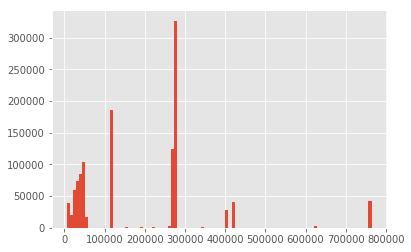

In [417]:
properties_2016_new['regionidneighborhood'].hist(bins = 100)

### Feature41,45: room cnt, unit cnt

### Feature42,44: story type, construction type: too many missing value just drop them

In [414]:
properties_2016_new = properties_2016_new.drop('storytypeid',axis = 1)
properties_2016_new = properties_2016_new.drop('typeconstructiontypeid',axis = 1)

In [419]:
properties_2016_new = properties_2016_new.drop('yardbuildingsqft17',axis = 1)
properties_2016_new = properties_2016_new.drop('yardbuildingsqft26',axis = 1)

### Summary

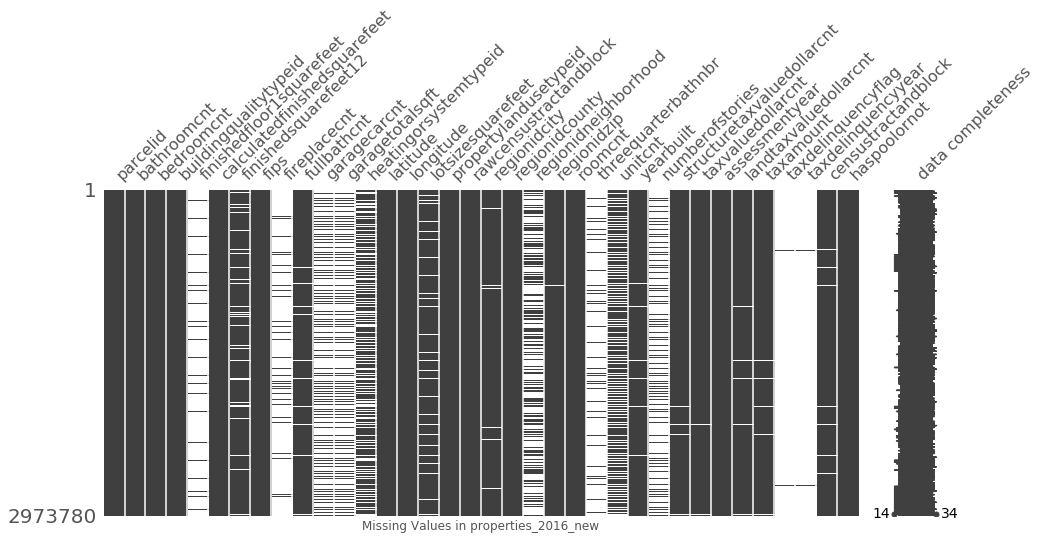

In [420]:
file = 'properties_2016_new'
msno.matrix(df=eval(file), figsize=(15,6),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

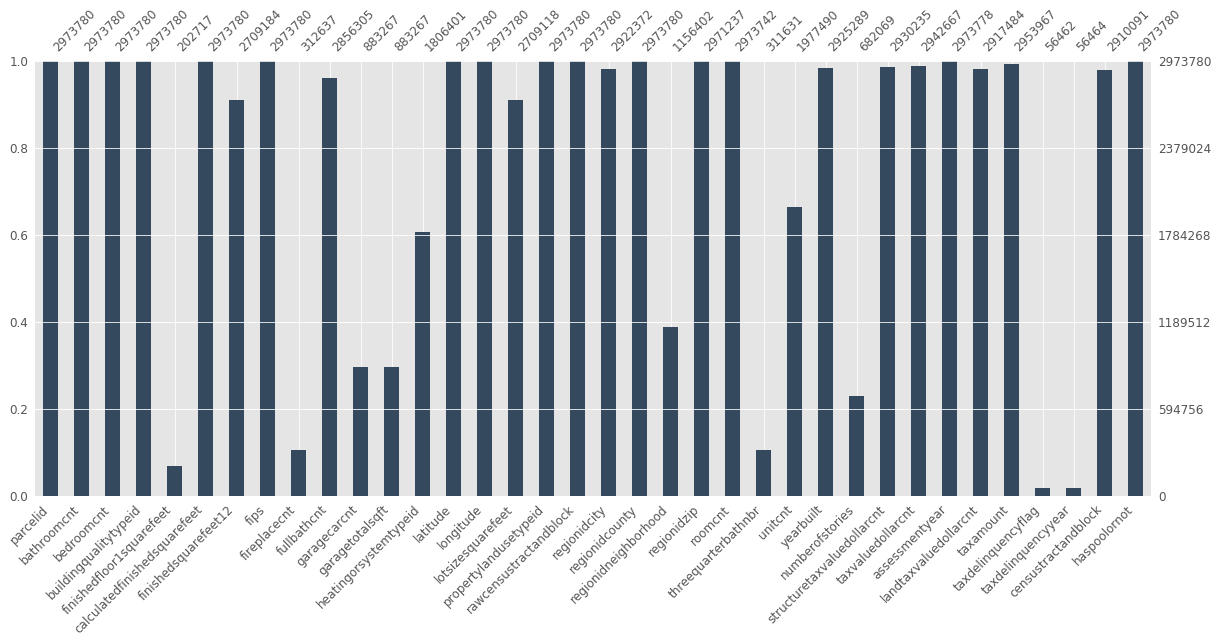

In [423]:
msno.bar(properties_2016_new,figsize=(20,8),color="#34495e",fontsize=12,labels=True)

In [428]:
p1 = properties_2016_new['taxdelinquencyflag']
p1[p1.notna()] = 1.0
p1 = p1.fillna(0.0)
properties_2016_new['taxdelinquencyflag'] = p1
properties_2016_new['taxdelinquencyflag'].unique()

array([0., 1.])

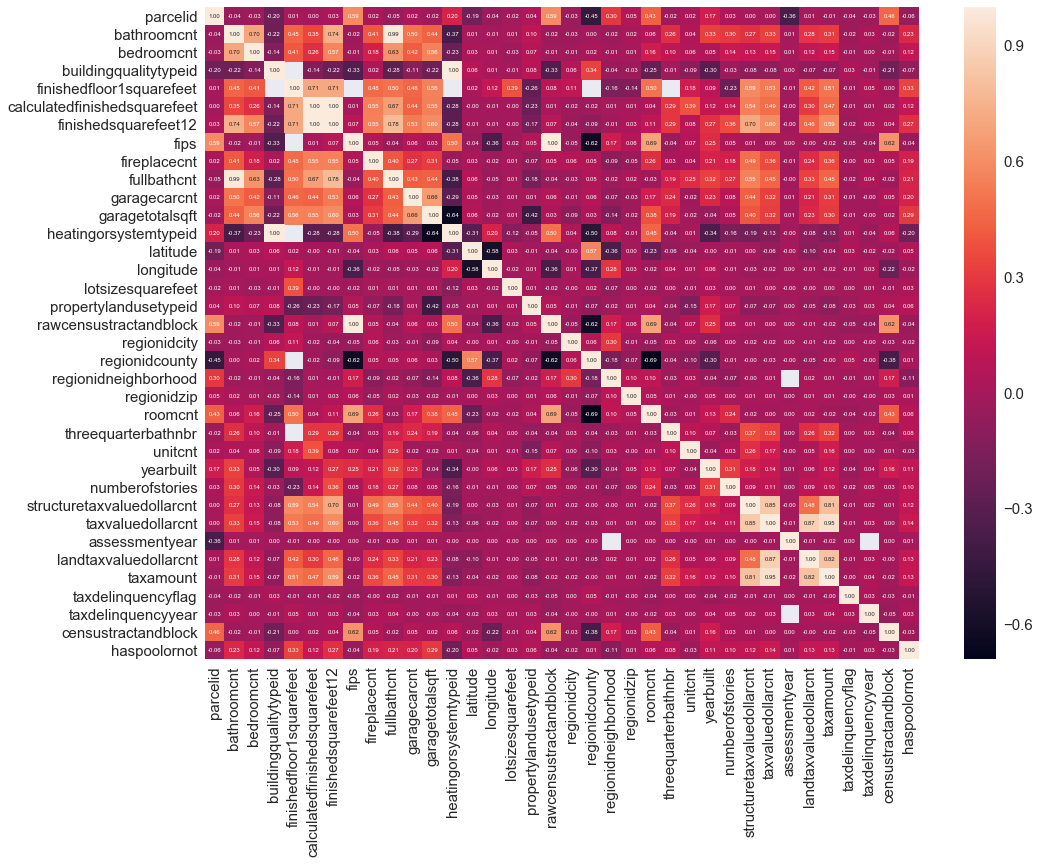

In [443]:
import seaborn as sns
cor_matrix = properties_2016_new.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (16,12))
sns.set(font_scale = 1.5)
hm = sns.heatmap(cor_matrix, cbar = True, annot = True, fmt = '.2f', annot_kws = {'size':6},
                 yticklabels = cols,
                 xticklabels = cols)
plt.savefig('corr.jpg')
plt.show()

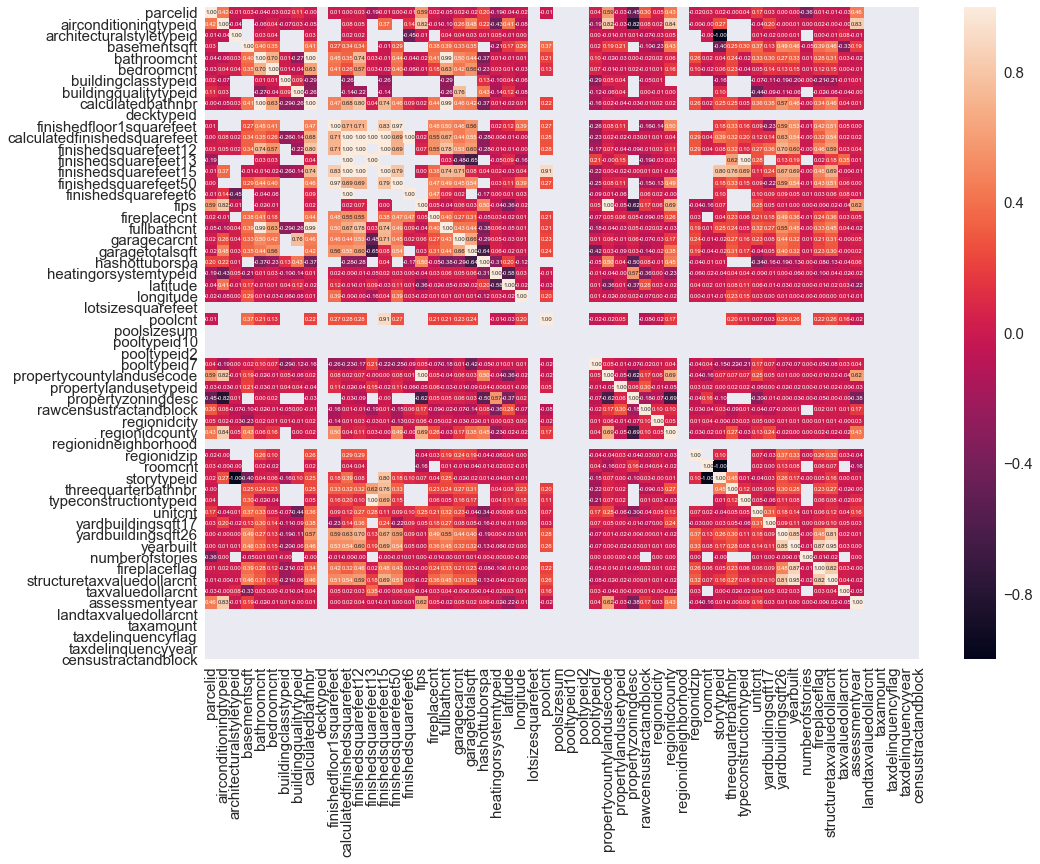

In [446]:
import seaborn as sns
cor_matrix1 = properties_2016.corr()
cols = properties_2016.columns.values
mask = np.zeros_like(cor_matrix1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (16,12))
sns.set(font_scale = 1.5)
hm = sns.heatmap(cor_matrix1, cbar = True, annot = True, fmt = '.2f', annot_kws = {'size':6},
                 yticklabels = cols,
                 xticklabels = cols)
plt.savefig('corr1.jpg')
plt.show()

#### Feature Dropped

airconditioningtypeid

architecturalstyletypeid

basementsqft

buildingclasstypeid

calculatedbathnbr

decktypeid

finishedfloor1squarefeet

finishedsquarefeet12

finishedsquarefeet13

finishedsquarefeet15

finishedsquarefeet6

fireplaceflag

hashottuborspa

poolsizesum

pooltypeid2

pooltypeid7

pooltypeid10

pooltypeid2 --> haspoolornot

propertycountylandusecode

propertyzoningdesc

storytypeid

typeconstructiontypeid

yardbuildingsqft17

yardbuildingsqft26

##### feature processing 
1. pooltypeid10,2,7 three type total has 30% data
2. aircondition type: 1, 5, 11, 13
3. architecture type: 7, 8, 2, 21, 3, 5
4. deck type: 66 ---- has or has not
5. heating system type:2, 7 
6. has hottub or spa only has True value, so we can assume missing value is False
7. threeqrt bath, story,fireplace number we can give Nan TO 0 fireplace
9. story type is 7 and missing a lot of data, so we can drop this features
10. construction type is frame and has a lot of missing value so we can drop this features

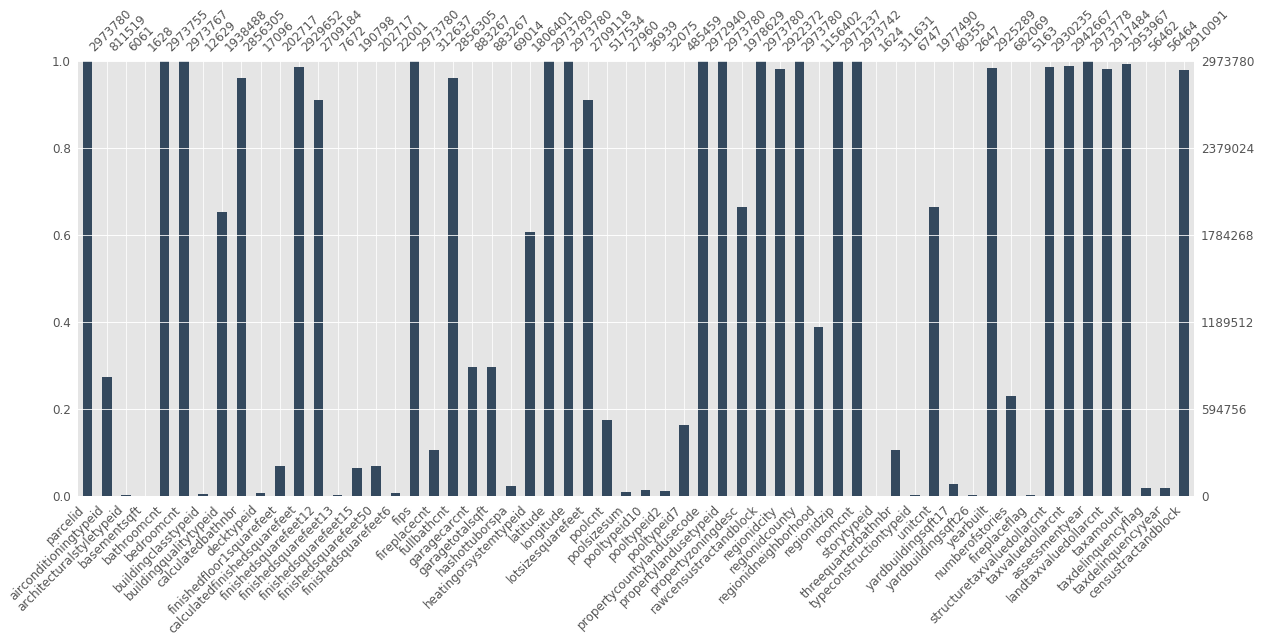

In [262]:
msno.bar(properties_2016,figsize=(20,8),color="#34495e",fontsize=12,labels=True)

In [77]:
properties_dis = properties_2016_new.describe()
properties_dis

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,...,unitcnt,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
count,2.985217e+06,811519.000000,2.973755e+06,2.973767e+06,1.938488e+06,2.856305e+06,202717.000000,2.929652e+06,2.709184e+06,190798.000000,...,1.977490e+06,80355.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,2.910091e+06
mean,1.332586e+07,1.931166,2.209143e+00,3.088949e+00,5.784787e+00,2.299263e+00,1380.630396,1.827162e+03,1.760001e+03,2739.187235,...,1.181171e+00,319.803397,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,6.048431e+13
std,7.909966e+06,3.148587,1.077754e+00,1.275859e+00,1.805352e+00,1.000736e+00,632.868543,1.819780e+03,9.710610e+02,5447.428327,...,2.447896e+00,233.086314,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,3.249035e+11
min,1.071172e+07,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000,1.000000e+00,1.000000e+00,112.000000,...,1.000000e+00,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,-1.000000e+00
25%,1.164371e+07,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,1012.000000,1.213000e+03,1.196000e+03,1694.000000,...,1.000000e+00,190.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,6.037400e+13
50%,1.254509e+07,1.000000,2.000000e+00,3.000000e+00,7.000000e+00,2.000000e+00,1283.000000,1.572000e+03,1.539000e+03,2172.000000,...,1.000000e+00,270.000000,1.963000e+03,1.000000,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,6.037572e+13
75%,1.409712e+07,1.000000,3.000000e+00,4.000000e+00,7.000000e+00,3.000000e+00,1615.000000,2.136000e+03,2.070000e+03,2976.000000,...,1.000000e+00,390.000000,1.981000e+03,2.000000,1.968890e+05,4.880000e+05,2.015000e+03,3.069180e+05,6.201005e+03,6.059042e+13
max,1.696019e+08,13.000000,2.000000e+01,2.000000e+01,1.200000e+01,2.000000e+01,31303.000000,9.525760e+05,2.903450e+05,820242.000000,...,9.970000e+02,7983.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,4.830301e+14


### Saving data

In [56]:
merged_2016_new.to_csv('./zillow data/merged_drop_new2016.csv')

In [58]:
merged_2017_new.to_csv('./zillow data/merged_drop_new2017.csv')

In [447]:
properties_2016_new.to_csv('./zillow data/properties_2016_new.csv')